# Amharic text analysis and visualization using heatmaps.
### This notebook analyzes character frequencies in Amharic text and visualizes them using a heatmap.

In [2]:
# Standard library imports
import os
import tempfile
from pathlib import Path

# Third-party imports 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from matplotlib import rcParams, font_manager as fm

# Local imports
from util.amharic_helper import AmharicAlphabet
from util.text import sample_text

### Download and configure Noto Sans Ethiopic font

In [ ]:
def download_ethiopic_font():
    """
    Returns:
        str: Path to downloaded font file
    """
    font_url = "https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansEthiopic/NotoSansEthiopic-Regular.ttf"
    temp_dir = Path(tempfile.gettempdir()) / "amharic_fonts"
    temp_dir.mkdir(exist_ok=True)
    
    font_path = temp_dir / "NotoSansEthiopic-Regular.ttf"
    
    if not font_path.exists():
        try:
            response = requests.get(font_url)
            response.raise_for_status()
            with open(font_path, 'wb') as f:
                f.write(response.content)
        except Exception as e:
            print(f"Error downloading font: {e}")
            return None
            
    return str(font_path)

In [ ]:
def count_character_frequencies(text):
    """
    Count frequency of each character in the text.
    Args:
        text (str): Input text to analyze
    Returns:
        dict: Character frequency counts
    """
    char_counts = {}
    for char in text:
        char_counts[char] = char_counts.get(char, 0) + 1
    return char_counts

In [ ]:
def create_heatmap_data(amharic, char_counts):
    """
    Create heatmap data array from character counts.
    Args:
        amharic (AmharicAlphabet): Amharic alphabet helper
        char_counts (dict): Character frequency counts
    Returns:
        tuple: Heat map array and letter array
    """
    heat_arr = []
    letter_arr = []
    
    for base_char in amharic.alphabet:
        freq_row = []
        letter_row = []
        letters = amharic.get_letter_family(base_char)
        
        for char in letters:
            freq_row.append(char_counts.get(char, 0))
            letter_row.append(char)
            
        heat_arr.append(freq_row)
        letter_arr.append(letter_row)
        
    return np.array(heat_arr), letter_arr

In [ ]:
def plot_character_heatmap(heat_arr, letter_arr):
    """
    Plot heatmap of character frequencies with Amharic labels.
    Args:
        heat_arr (np.array): Heat map data
        letter_arr (list): Amharic character labels
    """
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.imshow(heat_arr)
    plt.colorbar(im)

    for i in range(len(heat_arr)):
        for j in range(len(heat_arr[0])):
            ax.text(j, i, letter_arr[i][j],
                   ha="center", va="center", color="w")
    
    plt.show()

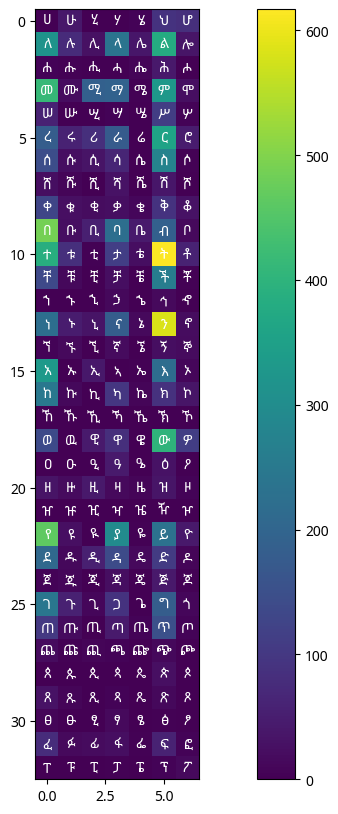

In [4]:
def main():
    # Initialize
    amharic = AmharicAlphabet()
    
    # Setup font
    font_path = download_ethiopic_font()
    if font_path:
        fm.fontManager.addfont(font_path)
        plt.rcParams['font.family'] = 'Noto Sans Ethiopic'
    
    # Process text
    processed_text = sample_text.replace(" ", "").replace("\n", "")
    char_counts = count_character_frequencies(processed_text)
    
    # Create and plot heatmap
    heat_arr, letter_arr = create_heatmap_data(amharic, char_counts)
    plot_character_heatmap(heat_arr, letter_arr)

if __name__ == "__main__":
    main()